In [1]:
import sys
sys.path.insert(1, '../scripts')

In [2]:
# analysis
import numpy as np
from scipy.stats import mannwhitneyu
import pandas as pd
import tempparse as paf

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Arial"

In [3]:
import warnings
warnings.filterwarnings('ignore')

## All AlphaFold regions

In [4]:
df = pd.read_csv('../../data/af_regions/sc_af_regions_all.csv')

In [5]:
# Calculate 'normalized' net charge
test_nc_abs = []

for index, row in df.iterrows():
    seq = row['region_seq'].upper()
    nc = np.abs((seq.count('R') + seq.count('K') - seq.count('E') + seq.count('D'))) / row['len_region']
    test_nc_abs.append(nc)

In [6]:
# Calculate scaled hydropathy
kd_scale = {"A": 1.8, "R": -4.5, "N": -3.5, "D": -3.5, "C": 2.5, "E": -3.5,
                      "Q": -3.5, "G": -0.4, "H": -3.2, "I": 4.5, "L": 3.8, "K": -3.9,
                      "M": 1.9, "F": 2.8, "P": -1.6, "S": -0.8, "T": -0.7, "W": -0.9,
                      "Y": -1.3, "V": 4.2}

vals = list(kd_scale.values())
scaled_vals = [v-np.min(vals) for v in vals]


kd_scale_norm = {}
for k in kd_scale.keys():
    kd_scale_norm[k] = (kd_scale[k] - np.min(vals)) / np.max(scaled_vals)

In [7]:
test_norm_hydropathy = []

for index, row in df[1:5].iterrows():
    seq = row['region_seq'].upper()
    test_norm_hydropathy.append(paf.calculate_hydropathy(seq, scale = kd_scale_norm))

In [8]:
fdir = "/mnt/d/research/drummond-lab/data/cerevisiae-alphafold-output/"

In [9]:
def append_hydropathy(row):
    seq = row['region_seq']
    return paf.calculate_hydropathy(seq, scale=kd_scale_norm)

In [10]:
df['norm_hydrop'] = df.apply(lambda row: append_hydropathy(row), axis=1)

In [11]:
def append_norm_nc(row):
    seq = row['region_seq']
    nc = np.abs((seq.count('R') + seq.count('K') - seq.count('E') + seq.count('D'))) / row['len_region']
    return nc

In [12]:
df['norm_nc'] = df.apply(lambda row: append_norm_nc(row), axis=1)

In [13]:
def append_uversky_pred(row):
    norm_hydrop = row['norm_hydrop']
    norm_nc = row['norm_nc']
    if norm_nc > 2.785 * norm_hydrop - 1.151:
        return "disordered"
    else:
        return "helix"

In [14]:
df['uversky_pred'] = df.apply(lambda row: append_uversky_pred(row), axis=1)

In [15]:
def append_uversky_correctness(row):
    if row['label'] == row['uversky_pred']:
        return 1
    else:
        return 0

In [16]:
df['uversky_correctness'] = df.apply(lambda row:append_uversky_correctness(row), axis=1)

In [17]:
df.to_csv('../../data/uversky/uversky_all.csv', index=False)

In [18]:
df = df.sort_values(by='label', ascending=False)

specify decimal places?

In [19]:
mannwhitneyu(df[df.label == 'helix']['norm_hydrop'].tolist(), df[df.label == 'disordered']['norm_hydrop'].tolist(),
             alternative='greater')

MannwhitneyuResult(statistic=53727637.0, pvalue=0.0)

In [20]:
mannwhitneyu(df[df.label == 'helix']['norm_nc'].tolist(), df[df.label == 'disordered']['norm_nc'].tolist(),
             alternative='greater')

MannwhitneyuResult(statistic=25543276.0, pvalue=1.0)

<Figure size 432x288 with 0 Axes>

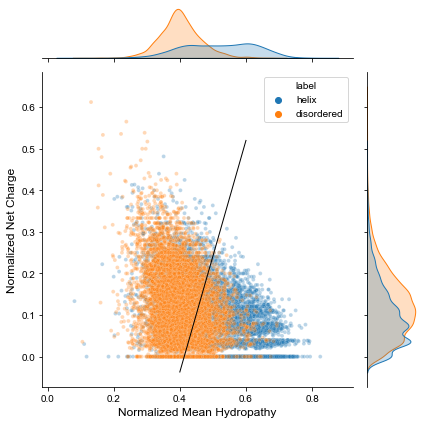

In [21]:
plt.figure()
g = sns.jointplot(data=df, x='norm_hydrop', y='norm_nc', hue='label',
                  alpha=0.3, s=15)
x = np.linspace(0.4,0.6,100)
y = 2.785*x - 1.151
g.ax_joint.plot(x, y, 'black', linewidth = 1)
g.ax_joint.set_xlabel('Normalized Mean Hydropathy', fontsize=12)
g.ax_joint.set_ylabel('Normalized Net Charge', fontsize=12)
plt.tight_layout()
plt.show()

## Random non-highly-charged regions

In [22]:
df_rd = pd.read_csv('../../data/af_regions/random_af_regions_low_thresh.csv')

In [23]:
def append_len_region(row):
    return len(row['seq'])

In [24]:
df_rd['len_region'] = df_rd.apply(lambda row: append_len_region(row), axis=1)

In [25]:
# Calculate 'normalized' net charge
test_nc_abs = []

for index, row in df_rd.iterrows():
    seq = row['seq'].upper()
    nc = np.abs((seq.count('R') + seq.count('K') - seq.count('E') + seq.count('D'))) / row['len_region']
    test_nc_abs.append(nc)

In [26]:
# Calculate scaled hydropathy
kd_scale = {"A": 1.8, "R": -4.5, "N": -3.5, "D": -3.5, "C": 2.5, "E": -3.5,
                      "Q": -3.5, "G": -0.4, "H": -3.2, "I": 4.5, "L": 3.8, "K": -3.9,
                      "M": 1.9, "F": 2.8, "P": -1.6, "S": -0.8, "T": -0.7, "W": -0.9,
                      "Y": -1.3, "V": 4.2}

vals = list(kd_scale.values())
scaled_vals = [v-np.min(vals) for v in vals]


kd_scale_norm = {}
for k in kd_scale.keys():
    kd_scale_norm[k] = (kd_scale[k] - np.min(vals)) / np.max(scaled_vals)

In [27]:
test_norm_hydropathy = []

for index, row in df_rd[1:5].iterrows():
    seq = row['seq'].upper()
    test_norm_hydropathy.append(paf.calculate_hydropathy(seq, scale = kd_scale_norm))

In [28]:
fdir = "/mnt/d/research/drummond-lab/data/cerevisiae-alphafold-output/"

In [29]:
def append_hydropathy(row):
    seq = row['seq']
    return paf.calculate_hydropathy(seq, scale=kd_scale_norm)

In [30]:
df_rd['norm_hydrop'] = df_rd.apply(lambda row: append_hydropathy(row), axis=1)

In [31]:
def append_norm_nc(row):
    seq = row['seq']
    nc = np.abs((seq.count('R') + seq.count('K') - seq.count('E') + seq.count('D'))) / row['len_region']
    return nc

In [32]:
df_rd['norm_nc'] = df_rd.apply(lambda row: append_norm_nc(row), axis=1)

In [33]:
def append_uversky_pred(row):
    norm_hydrop = row['norm_hydrop']
    norm_nc = row['norm_nc']
    if norm_nc > 2.785 * norm_hydrop - 1.151:
        return "disordered"
    else:
        return "helix"

In [34]:
df_rd['uversky_pred'] = df_rd.apply(lambda row: append_uversky_pred(row), axis=1)

In [35]:
def append_uversky_correctness(row):
    if row['label'] == row['uversky_pred']:
        return 1
    else:
        return 0

In [36]:
df_rd['uversky_correctness'] = df_rd.apply(lambda row:append_uversky_correctness(row), axis=1)

In [37]:
df_rd.to_csv('../../data/uversky/uversky_random.csv', index=False)

In [38]:
df_rd = df_rd.sort_values(by='label', ascending=False)

<Figure size 432x288 with 0 Axes>

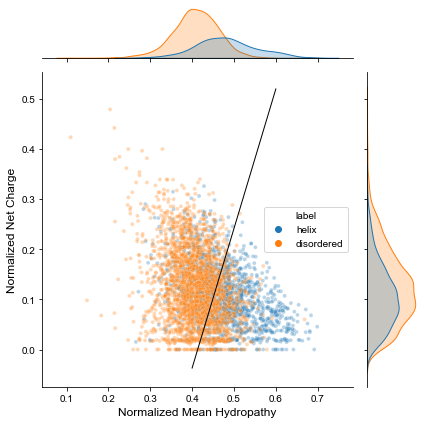

In [39]:
plt.figure()
g = sns.jointplot(data=df_rd, x='norm_hydrop', y='norm_nc', hue='label',
                  alpha=0.3, s=15)
x = np.linspace(0.4,0.6,100)
y = 2.785*x - 1.151
g.ax_joint.plot(x, y, 'black', linewidth = 1)
g.ax_joint.set_xlabel('Normalized Mean Hydropathy', fontsize=12)
g.ax_joint.set_ylabel('Normalized Net Charge', fontsize=12)
plt.tight_layout()
plt.show()

## Highly charged regions

In [40]:
df_hc = pd.read_csv('../../data/charged_regions/cr_filtered_labeled.csv')

In [41]:
# Calculate 'normalized' net charge
test_nc_abs = []

for index, row in df_hc.iterrows():
    seq = row['region.seq'].upper()
    nc = np.abs((seq.count('R') + seq.count('K') - seq.count('E') + seq.count('D'))) / row['region.len']
    test_nc_abs.append(nc)

In [42]:
# Calculate scaled hydropathy
kd_scale = {"A": 1.8, "R": -4.5, "N": -3.5, "D": -3.5, "C": 2.5, "E": -3.5,
                      "Q": -3.5, "G": -0.4, "H": -3.2, "I": 4.5, "L": 3.8, "K": -3.9,
                      "M": 1.9, "F": 2.8, "P": -1.6, "S": -0.8, "T": -0.7, "W": -0.9,
                      "Y": -1.3, "V": 4.2}

vals = list(kd_scale.values())
scaled_vals = [v-np.min(vals) for v in vals]


kd_scale_norm = {}
for k in kd_scale.keys():
    kd_scale_norm[k] = (kd_scale[k] - np.min(vals)) / np.max(scaled_vals)

In [43]:
test_norm_hydropathy = []

for index, row in df_hc[1:5].iterrows():
    seq = row['region.seq'].upper()
    test_norm_hydropathy.append(paf.calculate_hydropathy(seq, scale = kd_scale_norm))

In [44]:
fdir = "/mnt/d/research/drummond-lab/data/cerevisiae-alphafold-output/"

In [45]:
def append_hydropathy(row):
    seq = row['region.seq']
    return paf.calculate_hydropathy(seq, scale=kd_scale_norm)

In [46]:
df_hc['norm_hydrop'] = df_hc.apply(lambda row: append_hydropathy(row), axis=1)

In [47]:
def append_norm_nc(row):
    seq = row['region.seq']
    nc = np.abs((seq.count('R') + seq.count('K') - seq.count('E') + seq.count('D'))) / row['region.len']
    return nc

In [48]:
df_hc['norm_nc'] = df_hc.apply(lambda row: append_norm_nc(row), axis=1)

In [49]:
def append_uversky_pred(row):
    norm_hydrop = row['norm_hydrop']
    norm_nc = row['norm_nc']
    if norm_nc > 2.785 * norm_hydrop - 1.151:
        return "disordered"
    else:
        return "helix"

In [50]:
df_hc['uversky_pred'] = df_hc.apply(lambda row: append_uversky_pred(row), axis=1)

In [51]:
def append_uversky_correctness(row):
    if row['label'] == row['uversky_pred']:
        return 1
    else:
        return 0

In [52]:
df_hc['uversky_correctness'] = df_hc.apply(lambda row:append_uversky_correctness(row), axis=1)

In [53]:
df_hc.to_csv('../../data/uversky/uversky_hc.csv', index=False)

In [54]:
df_hc = df_hc.sort_values(by='label', ascending=False)

<Figure size 432x288 with 0 Axes>

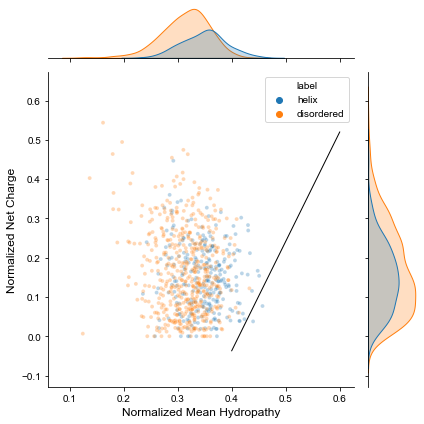

In [55]:
plt.figure()
g = sns.jointplot(data=df_hc, x='norm_hydrop', y='norm_nc', hue='label',
                  alpha=0.3, s=15)
x = np.linspace(0.4,0.6,100)
y = 2.785*x - 1.151
g.ax_joint.plot(x, y, 'black', linewidth = 1)
g.ax_joint.set_xlabel('Normalized Mean Hydropathy', fontsize=12)
g.ax_joint.set_ylabel('Normalized Net Charge', fontsize=12)
plt.tight_layout()
plt.show()

## Accuracy

In [56]:
sum(df['uversky_correctness']) / len(df)

0.753097667638484

In [57]:
cnf_matrix = np.array([[0, 0], [0, 0]])
cnf_matrix[0, 0] = len(df[(df.label == 'disordered') & (df.uversky_pred == 'disordered')])
cnf_matrix[0, 1] = len(df[(df.label == 'disordered') & (df.uversky_pred == 'helix')])
cnf_matrix[1, 0] = len(df[(df.label == 'helix') & (df.uversky_pred == 'disordered')])
cnf_matrix[1, 1] = len(df[(df.label == 'helix') & (df.uversky_pred == 'helix')])